In [21]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np
plt.rcParams['figure.figsize'] = [17, 17]

In [22]:
from harmony import ChromaticNecklace

In [23]:
G = nx.DiGraph()

In [24]:
init = ChromaticNecklace('major', 0)

In [25]:
edges, togo = [], [init]

In [26]:
while togo:
    current = togo.pop()
    for idx in range(12):
        if current.is_movable(idx):
            adjacent = current.move(idx)
            edge = (
                (current.name, current.color),
                (adjacent.name, adjacent.color)
            )
            if edge not in G.edges:
                G.add_edge(*edge, edge_label=idx)
                togo.append(adjacent)

In [27]:
indices = [(x*7) % 12 for x in range(12)]
def get_theta(x, offset=0):
    return (x * 7 + offset) % 12

In [28]:
phi = ((np.sqrt(5)+1)/2)

In [29]:
# Check different orderings
scales = ['harmonic_major', 'harmonic_minor', 'major', 'melodic_minor']
offsets = [-1, -2, 0, -1]
order = [2, 3, 4, 5]
def layout(graph):
    nodes = [n for n in graph.nodes if n[0] in scales]
    theta = [(3 - get_theta(n[1], offsets[scales.index(n[0])])) * (np.pi / 6) for n in nodes]
    rad = [order[scales.index(n[0])] for n in nodes]
    rad =[r*2 + 5 for r in rad]
    return {n: (r * np.cos(t), r * np.sin(t)) for n, r, t in zip(nodes, rad, theta)}

In [30]:
improper = ['wholetone', 'octatonic', 'augmented']
imp_offsets = [0, -1.5, -1.5]
imp_order = [6, 1, 0]
division = [6, 4, 3]
def improper_layout(graph):
    nodes = [n for n in graph.nodes if n[0] in improper]
    theta = [(3 - get_theta(division[improper.index(n[0])] * n[1], imp_offsets[improper.index(n[0])])) * (np.pi / 6) for n in nodes]
    rad = [imp_order[improper.index(n[0])] for n in nodes]
    rad =[r*2 + 5 for r in rad]
    return {n: (r * np.cos(t), r * np.sin(t)) for n, r, t in zip(nodes, rad, theta)}

In [31]:
def to_label(node):
    mapping = {'major': 'M', 'melodic_minor': 'mm', 'harmonic_minor': 'hm', 'harmonic_major': 'HM', 'augmented': 'a', 'octatonic':'o', 'wholetone': 'wt'}
    return f'{mapping[node[0]]}{node[1]}'

# TODO: Write all edge related dat into the edges themselves

In [32]:
colors = {}
for x in G.edges.data():
    colors[x[:2]] = f"{x[2]['edge_label']}-{(x[2]['edge_label']+1) % 12}"

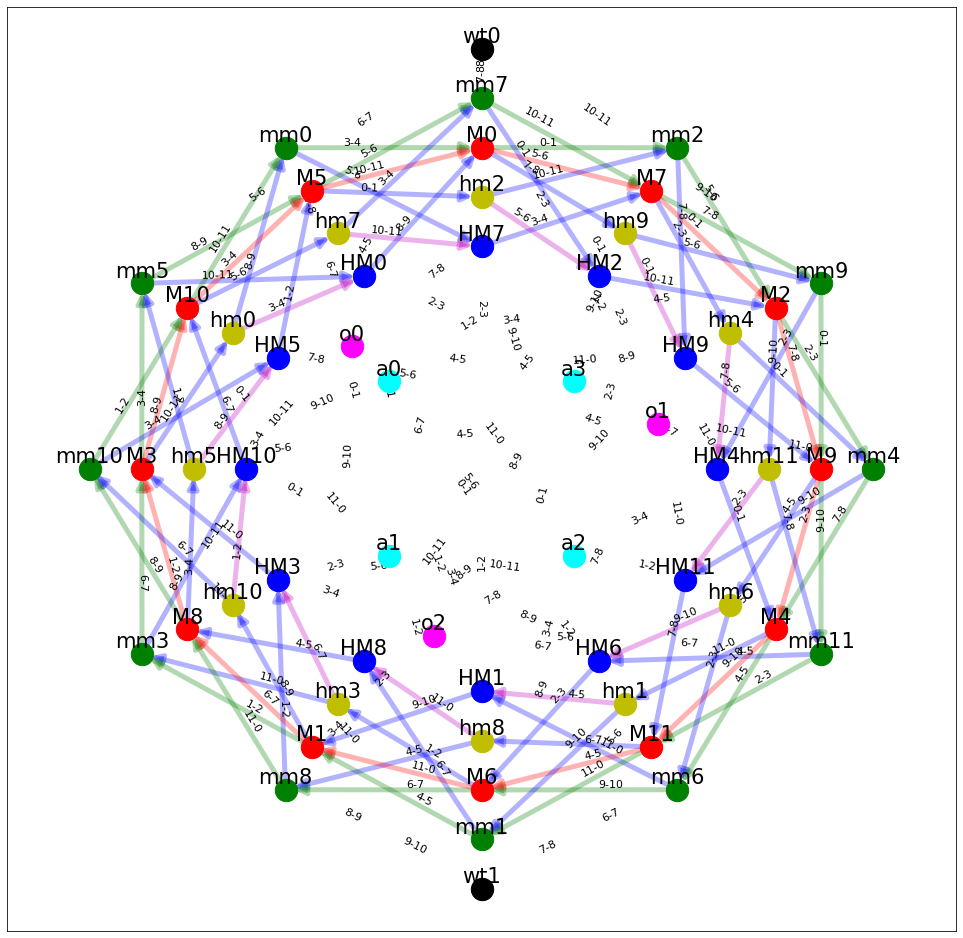

In [44]:
majors = [n for n in G.nodes if n[0] == 'major']
melodic_minors = [n for n in G.nodes if n[0] == 'melodic_minor']
harmonic_majors = [n for n in G.nodes if n[0] == 'harmonic_major']
harmonic_minors = [n for n in G.nodes if n[0] == 'harmonic_minor']
augmenteds = [n for n in G.nodes if n[0] == 'augmented']
octatonics = [n for n in G.nodes if n[0] == 'octatonic']
wholetones = [n for n in G.nodes if n[0] == 'wholetone']

labels = {node: to_label(node) for node in G.nodes}
pos = layout(G)
pos2= improper_layout(G)
pos = {**pos, **pos2}

color_map = {
    ('major', 'major'): 'r',
    ('major', 'melodic_minor'): 'g',
    ('melodic_minor', 'major'): 'g',
    ('melodic_minor', 'harmonic_major'): 'b',
    ('harmonic_major', 'major'): 'b',
    ('major', 'harmonic_minor'): 'b',
    ('harmonic_minor', 'melodic_minor'): 'b',
    ('harmonic_minor', 'harmonic_major'): 'm',

    ('melodic_minor', 'wholetone'): 'white',
    ('melodic_minor', 'octatonic'): 'white',
    ('harmonic_major', 'octatonic'): 'white',
    ('harmonic_major', 'augmented'): 'white',
    ('octatonic', 'melodic_minor'): 'white',
    ('octatonic', 'harmonic_minor'): 'white',
    ('wholetone', 'melodic_minor'): 'white',
    ('augmented', 'harmonic_minor'): 'white',
}

edge_colors = [color_map[(a[0], b[0])] for a, b in G.edges]
# edge_colors = ['b' if a[1] != b[1] else 'r' for a, b in G.edges]

nx.draw_networkx_nodes(G, pos, nodelist=majors, node_color="r", node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=melodic_minors, node_color="g", node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=harmonic_majors, node_color="b", node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=harmonic_minors, node_color="y", node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=augmenteds, node_color="cyan", node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=octatonics, node_color="magenta", node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=wholetones, node_color="black", node_size=500)
nx.draw_networkx_labels(G, {key: (val[0], val[1]+0.5) for key, val in pos.items()}, labels, font_size=21)
# edge_list = [(a, b) for a, b in G.edges if a[1] != b[1]]
edge_list = [(a, b) for a, b in G.edges if a[0] in scales and b[0] in scales]
edge_colors = [c for (a, b), c in zip(G.edges, edge_colors) if a[0] in scales and b[0] in scales]
nx.draw_networkx_edges(
    G,
    pos,
    width=5,
    edgelist=edge_list,
    arrowsize=20,
    alpha=0.3,
    edge_color=edge_colors,
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=colors, label_pos=0.66, verticalalignment='bottom', bbox={'alpha': 0.0}, font_size=11)

plt.show()

In [15]:
H = nx.DiGraph()
for edge in G.edges:
    edgex = (edge[0][0], edge[1][0])
    if edgex not in H.edges:
        H.add_edge(*edgex, edge_color='b' if edge[0][1] != edge[1][1] or edge[0][0] in improper or edge[1][0] in improper else 'r')

In [16]:
ec = [e[2]['edge_color'] for e in H.edges.data()]

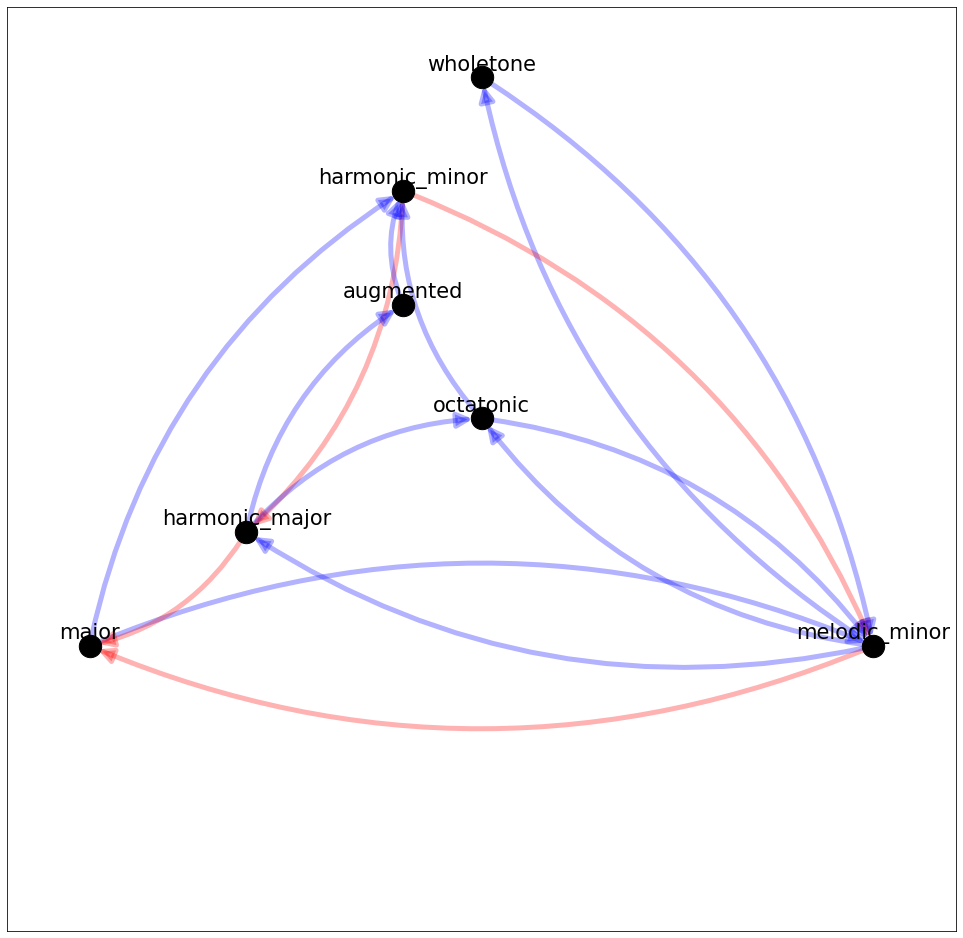

In [17]:
pos = nx.planar_layout(H)

nx.draw_networkx_nodes(H, pos, node_color="black", node_size=500)
nx.draw_networkx_labels(H, {key: (val[0], val[1]+0.02) for key, val in pos.items()}, {n: n for n in H.nodes}, font_size=21)

nx.draw_networkx_edges(
    H,
    pos,
    width=5,
    arrowsize=30,
    alpha=0.3,
    edge_color=ec,
    connectionstyle='arc3,rad=-0.21'
)
plt.show()

In [18]:
cycles = [len(c) for c in nx.simple_cycles(H)]

In [19]:
len(cycles)

16

['major']


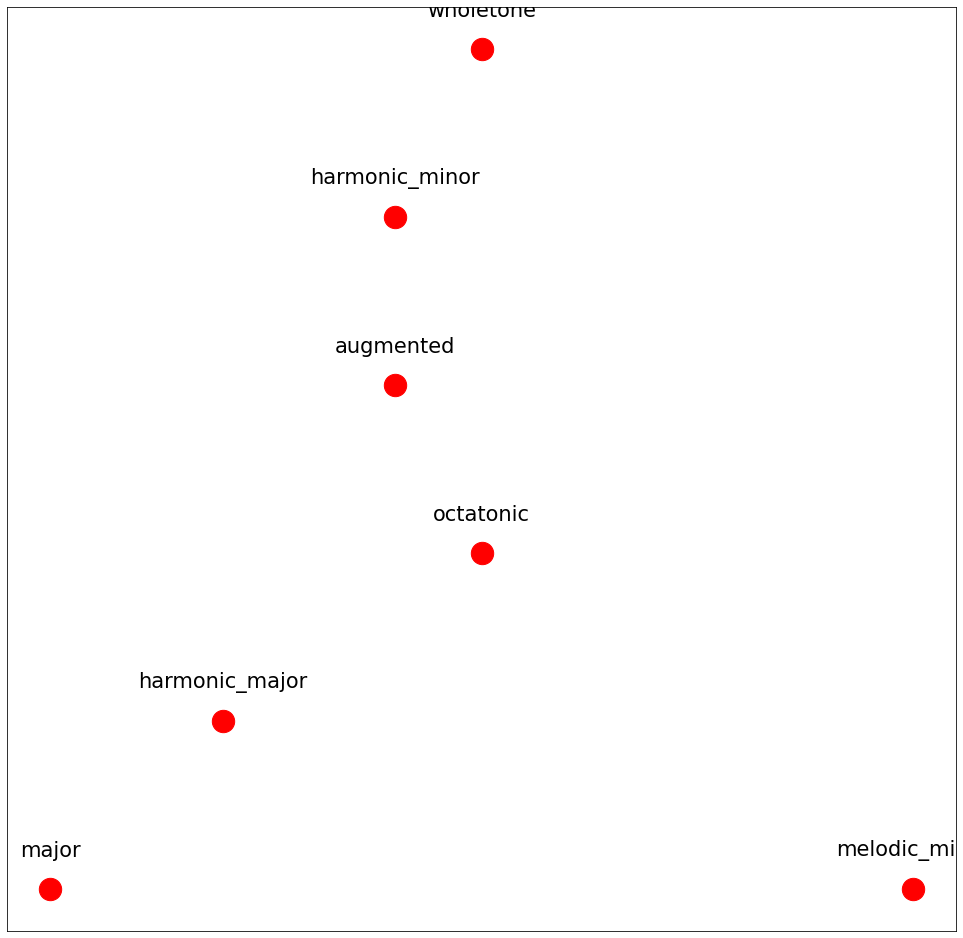

['melodic_minor', 'octatonic', 'harmonic_minor']


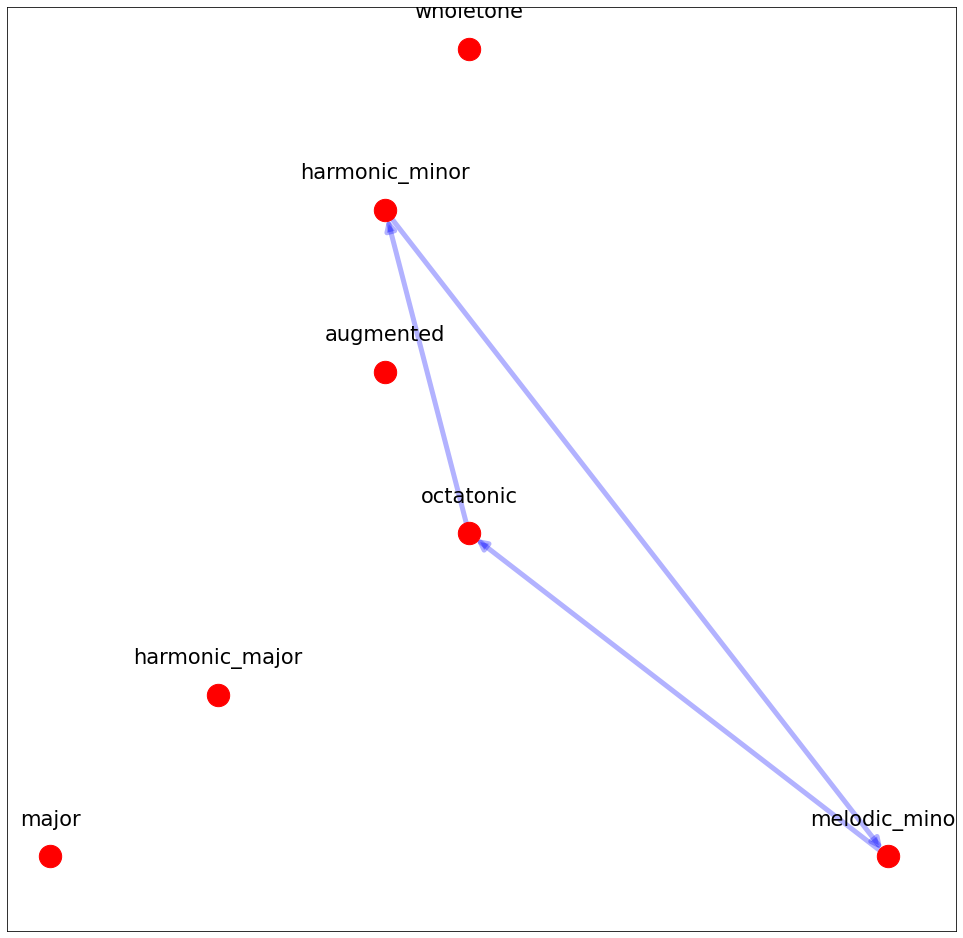

['melodic_minor', 'octatonic', 'harmonic_minor', 'harmonic_major', 'major']


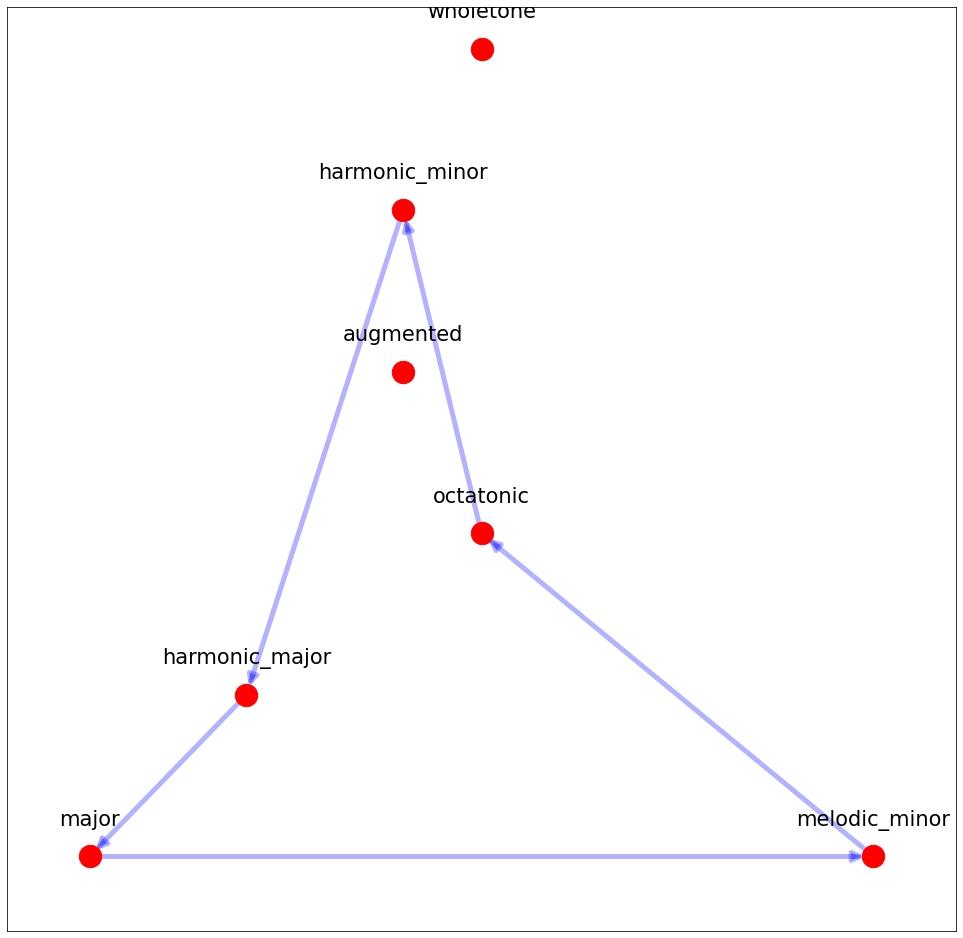

['melodic_minor', 'octatonic']


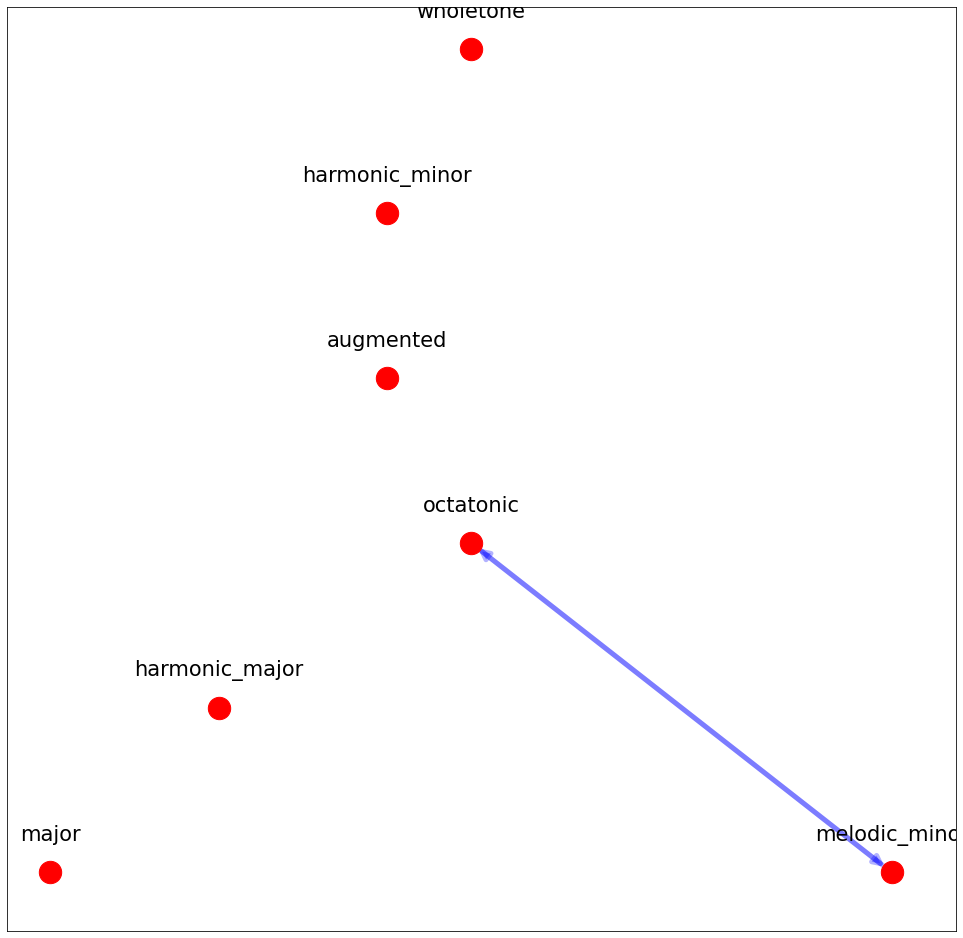

['melodic_minor', 'harmonic_major', 'augmented', 'harmonic_minor']


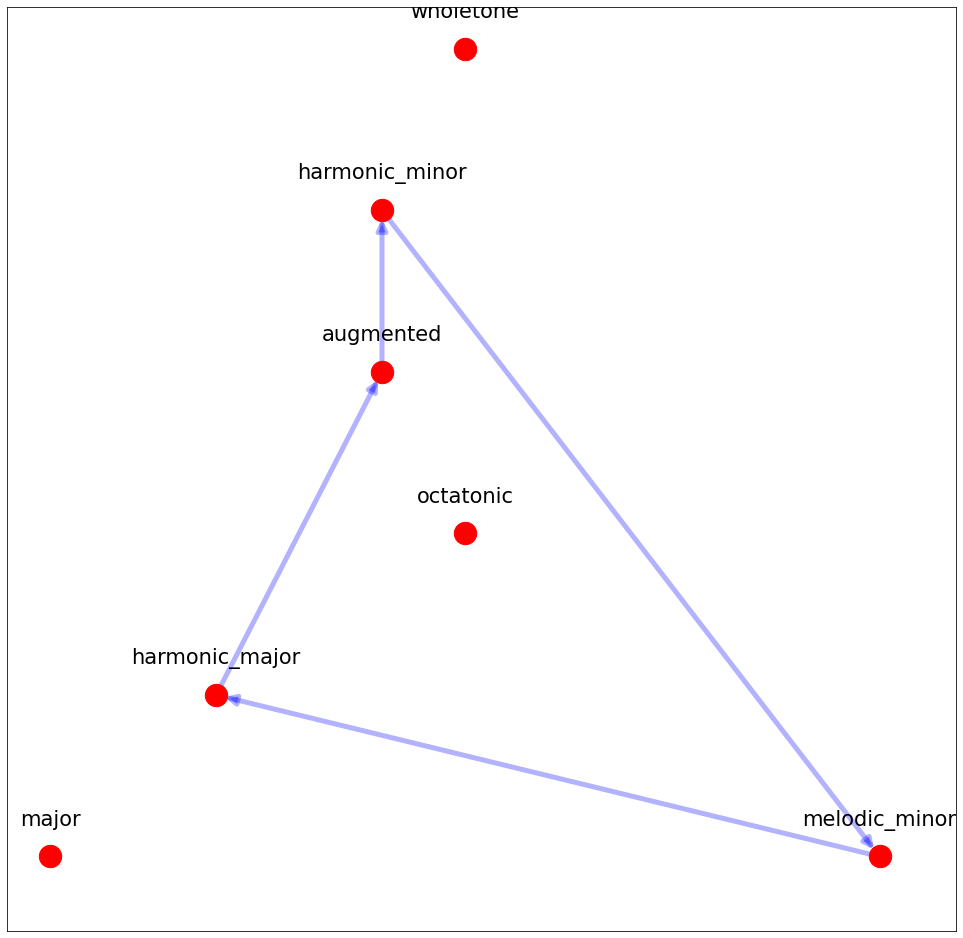

['melodic_minor', 'harmonic_major', 'octatonic', 'harmonic_minor']


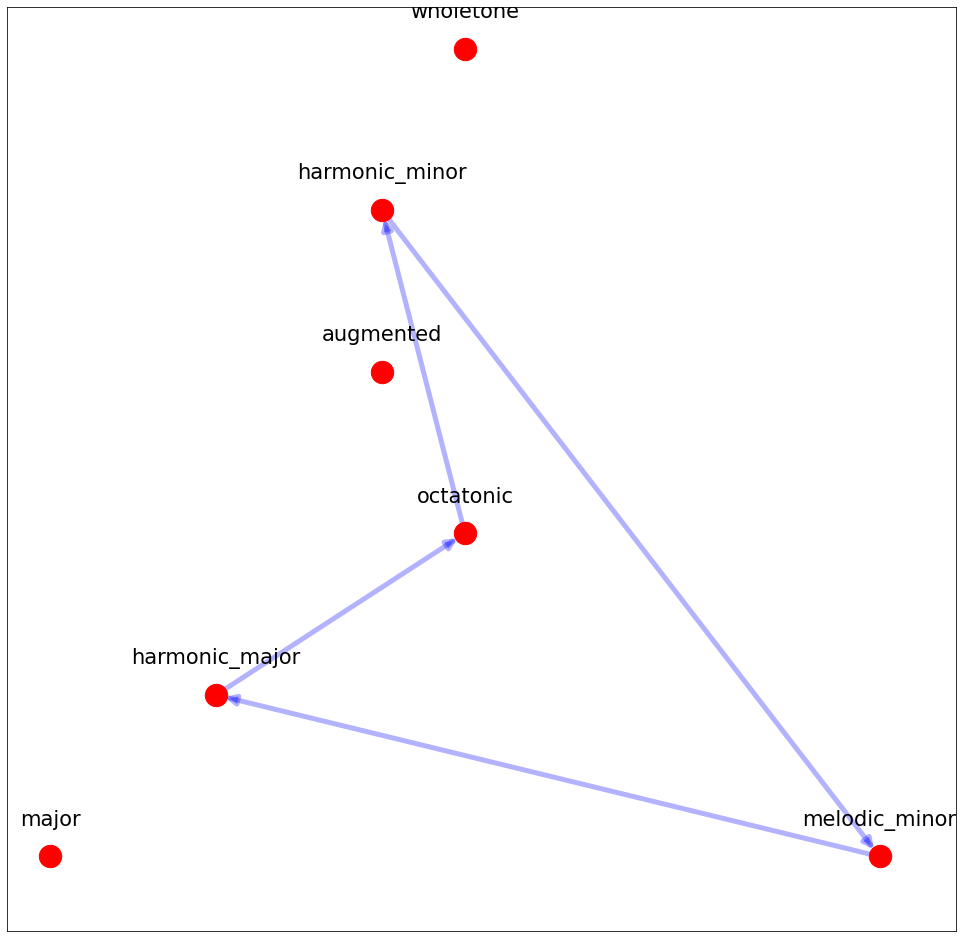

['melodic_minor', 'harmonic_major', 'octatonic']


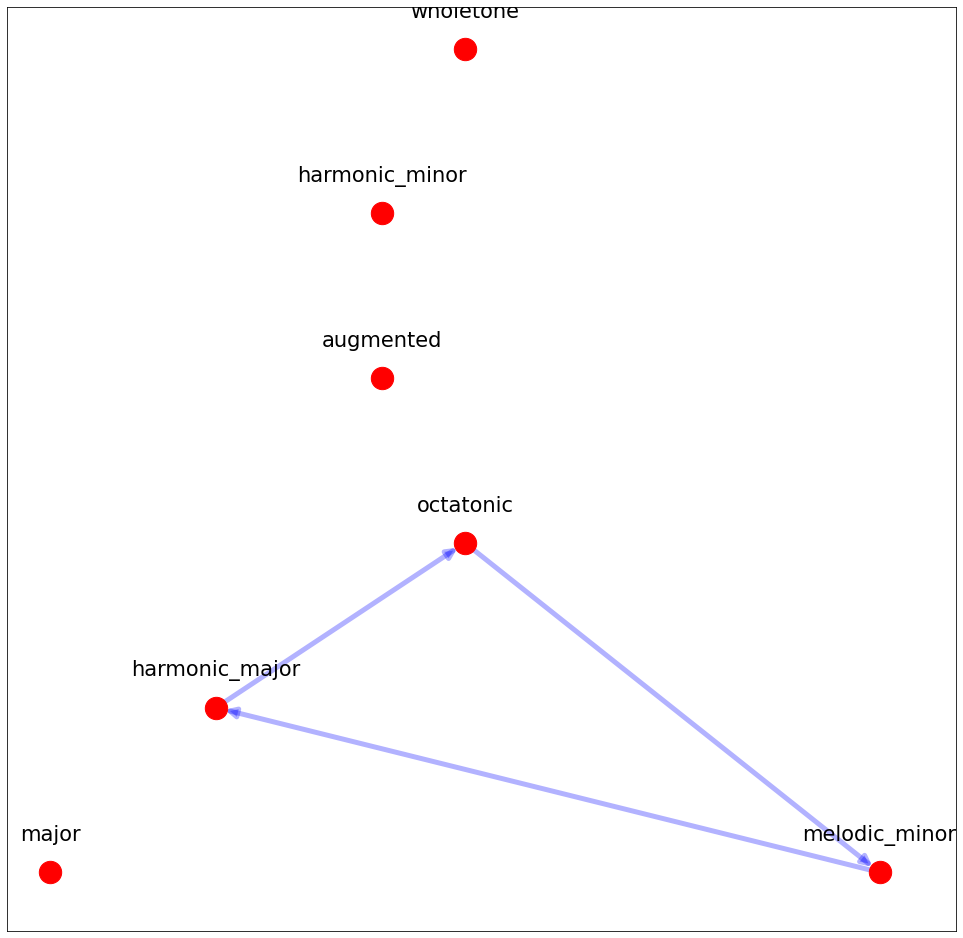

['melodic_minor', 'harmonic_major', 'major', 'harmonic_minor']


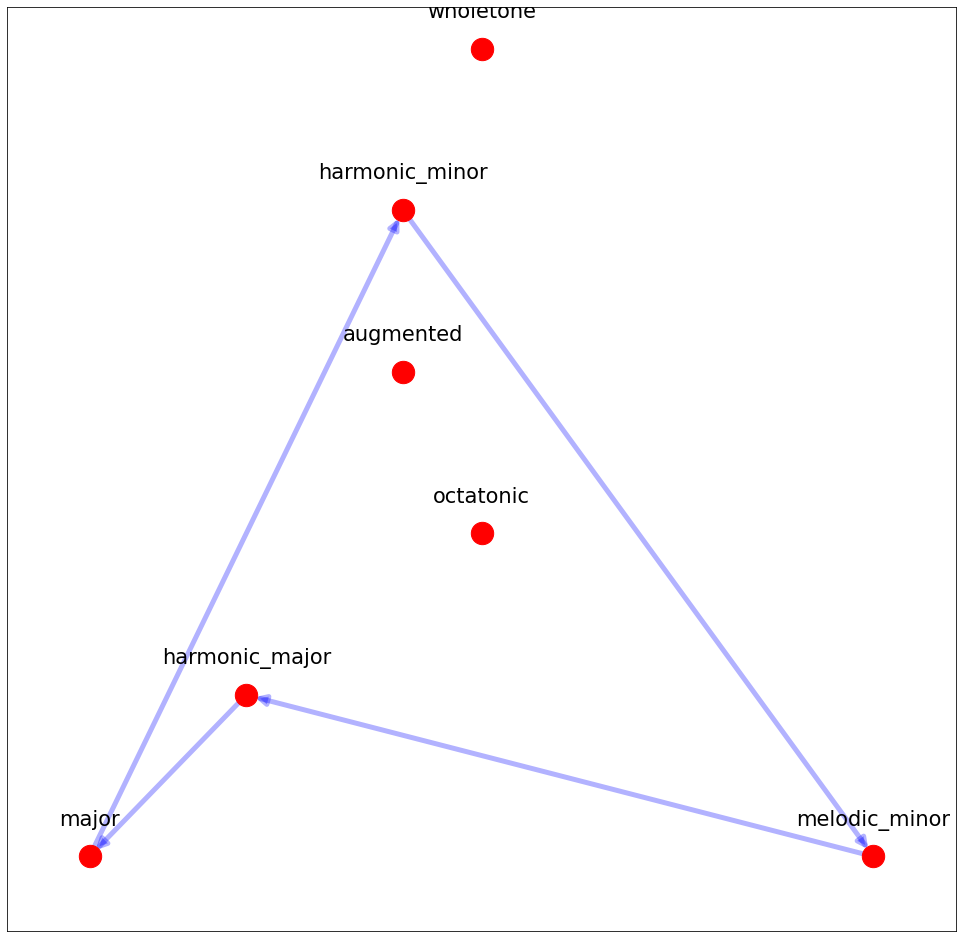

['melodic_minor', 'harmonic_major', 'major']


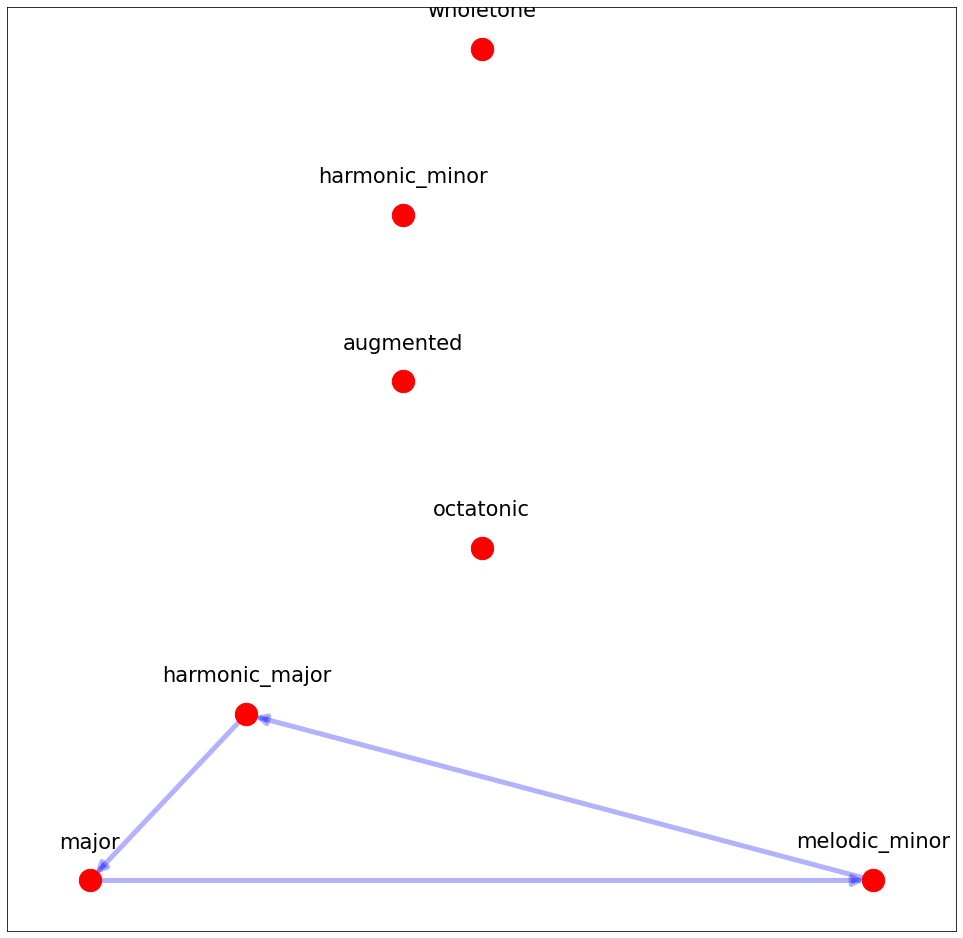

['melodic_minor', 'major', 'harmonic_minor']


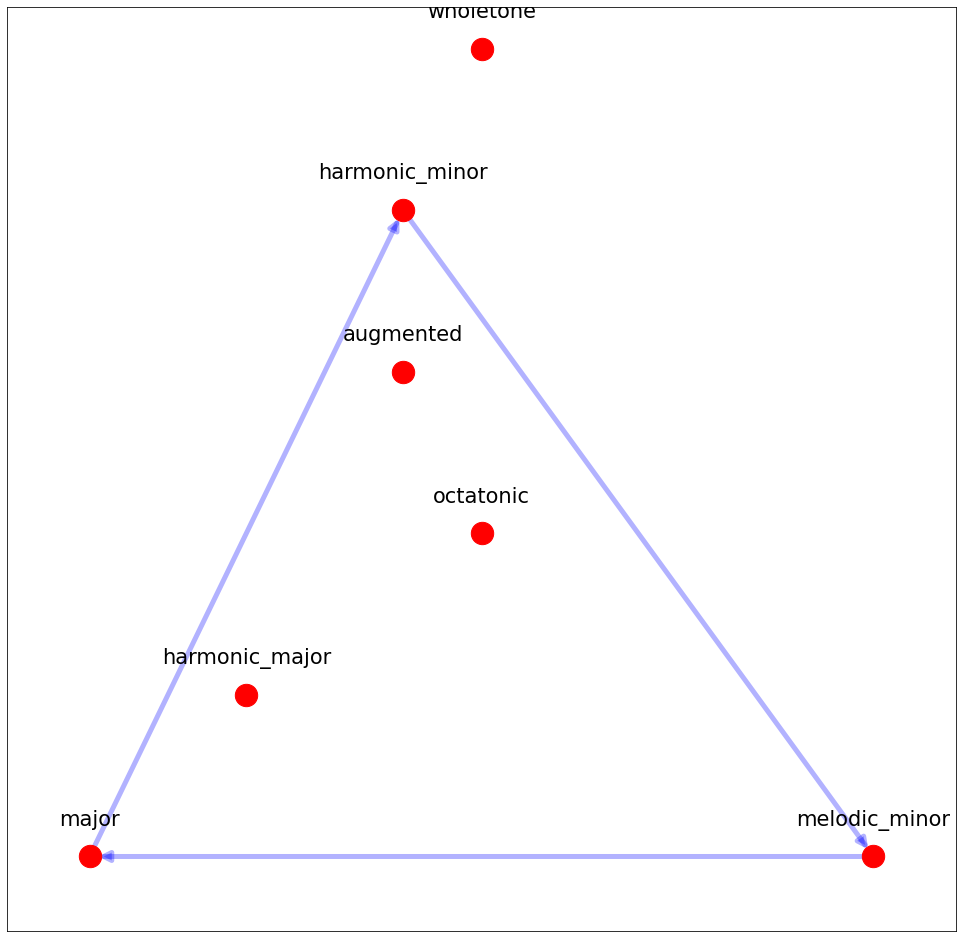

['melodic_minor', 'major', 'harmonic_minor', 'harmonic_major', 'octatonic']


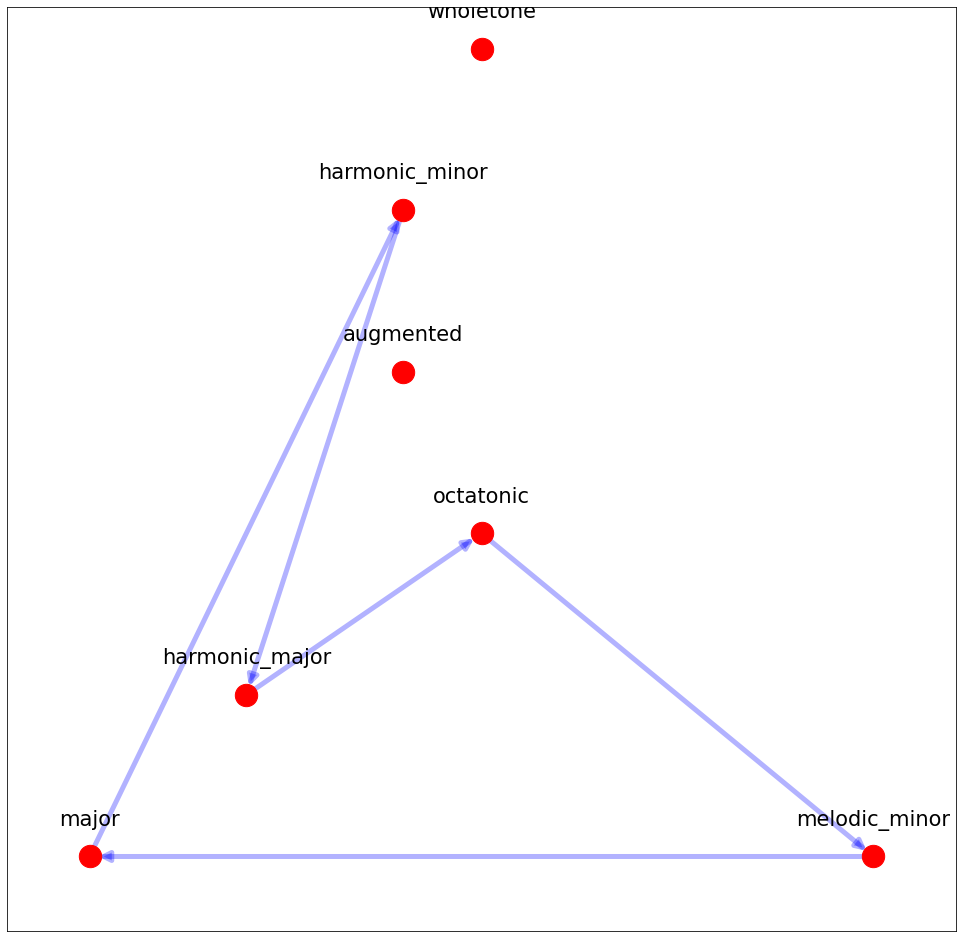

['melodic_minor', 'major']


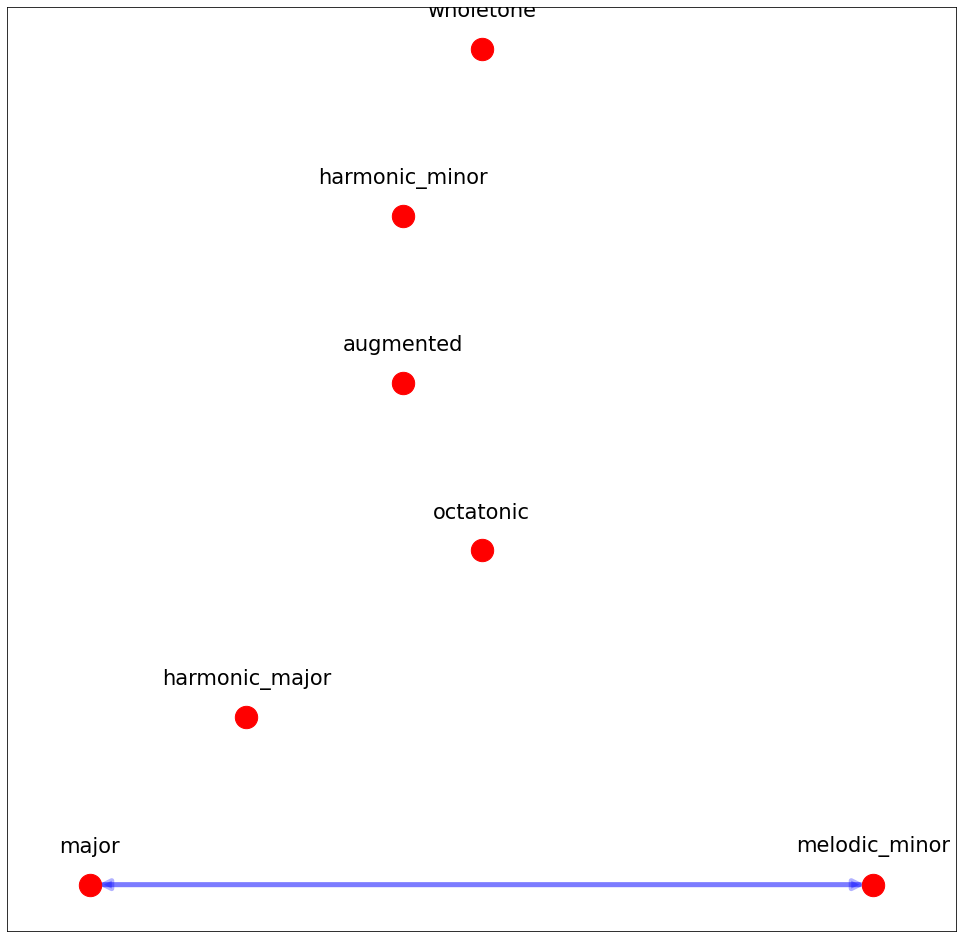

['melodic_minor', 'wholetone']


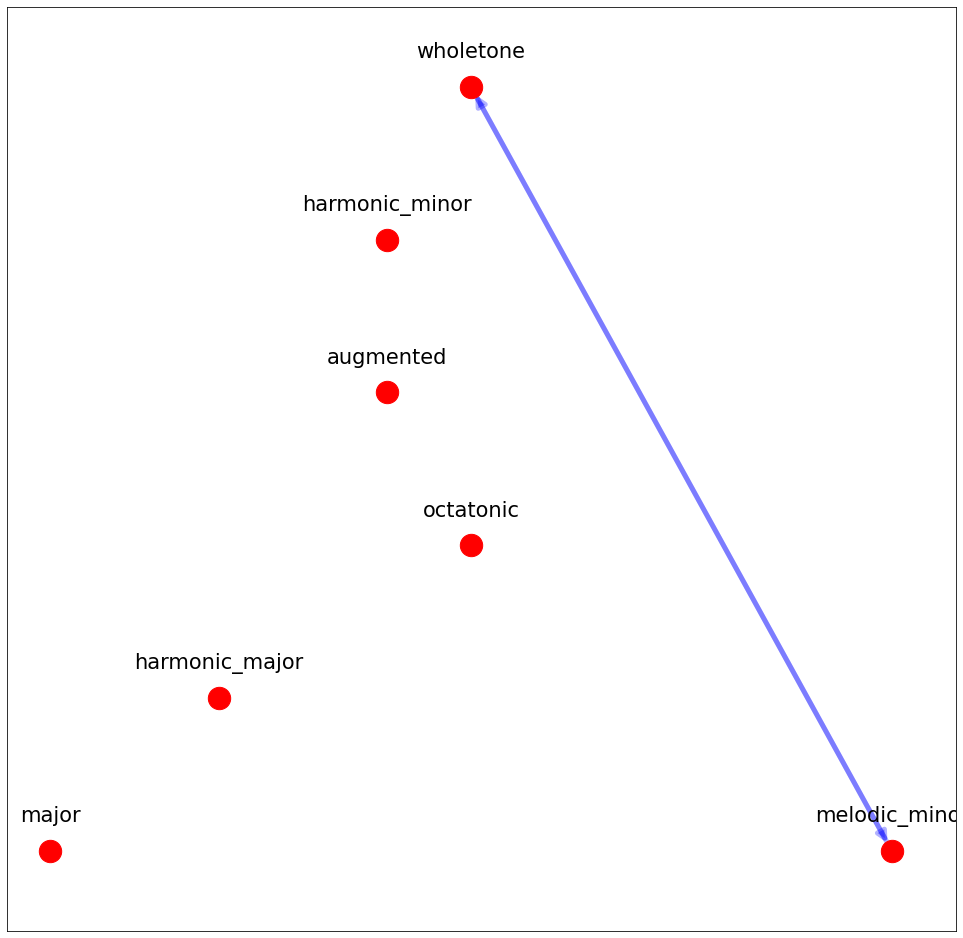

['augmented', 'harmonic_minor', 'harmonic_major']


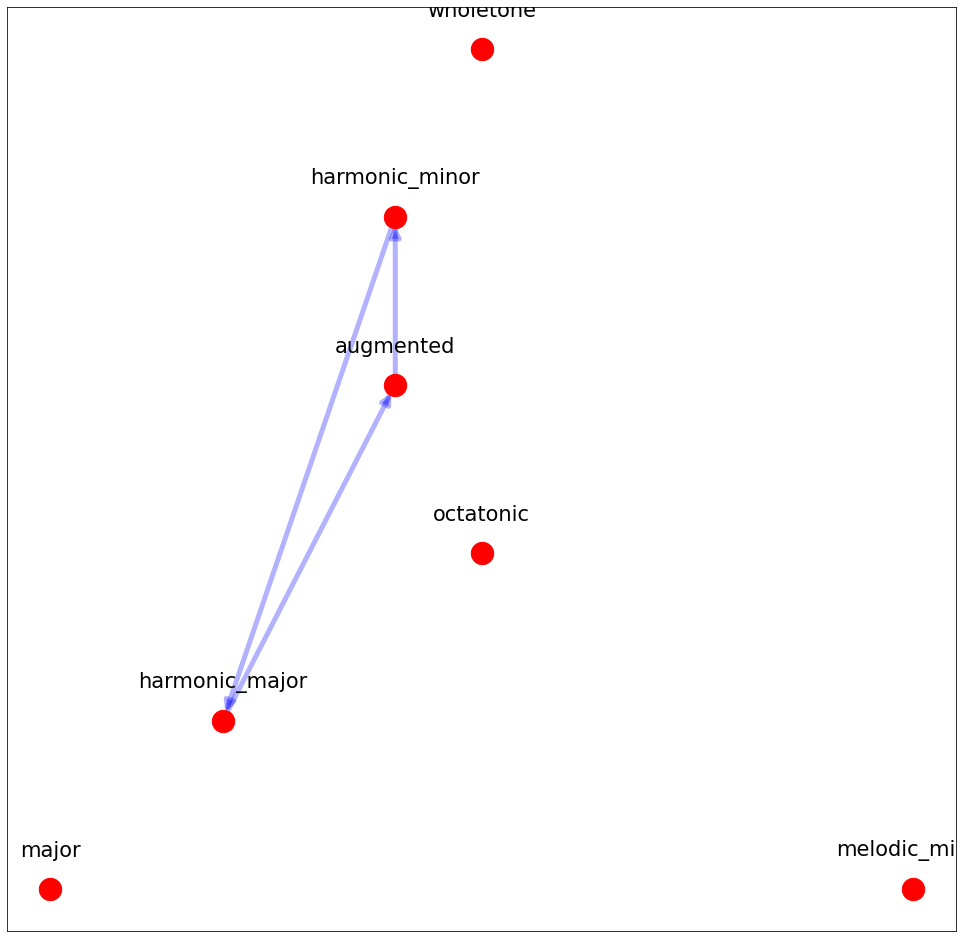

['major', 'harmonic_minor', 'harmonic_major']


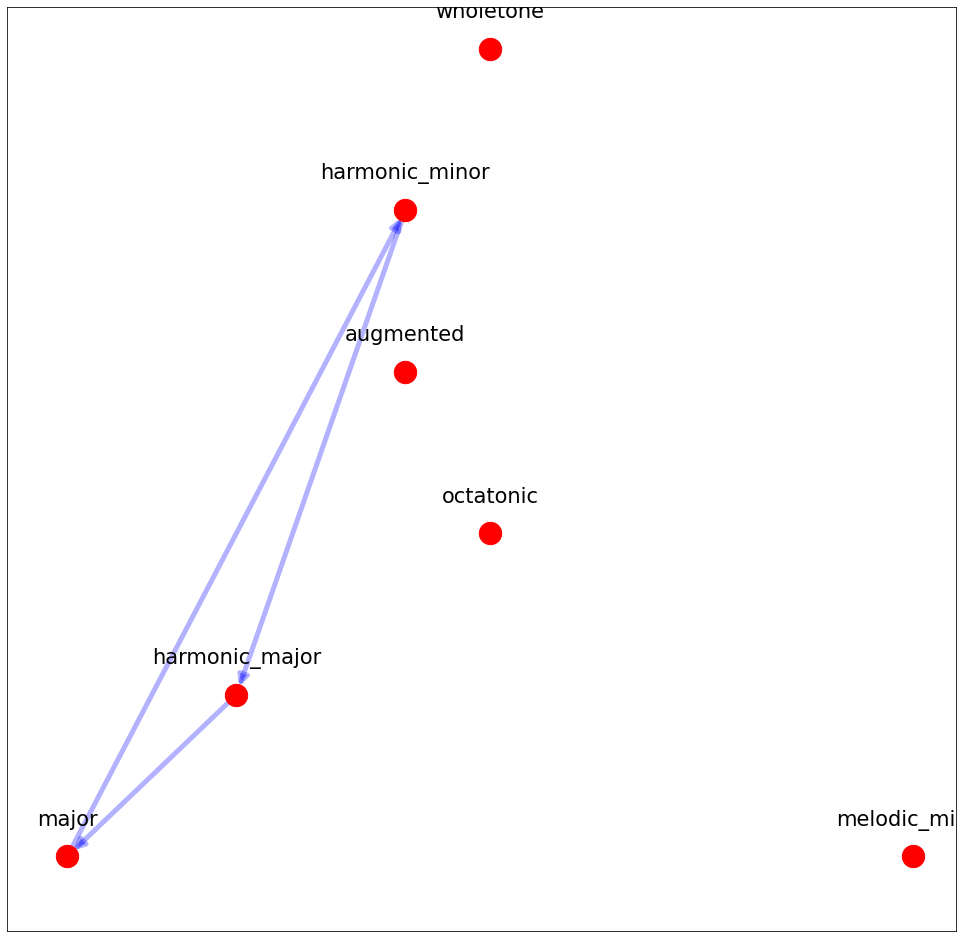

['octatonic', 'harmonic_minor', 'harmonic_major']


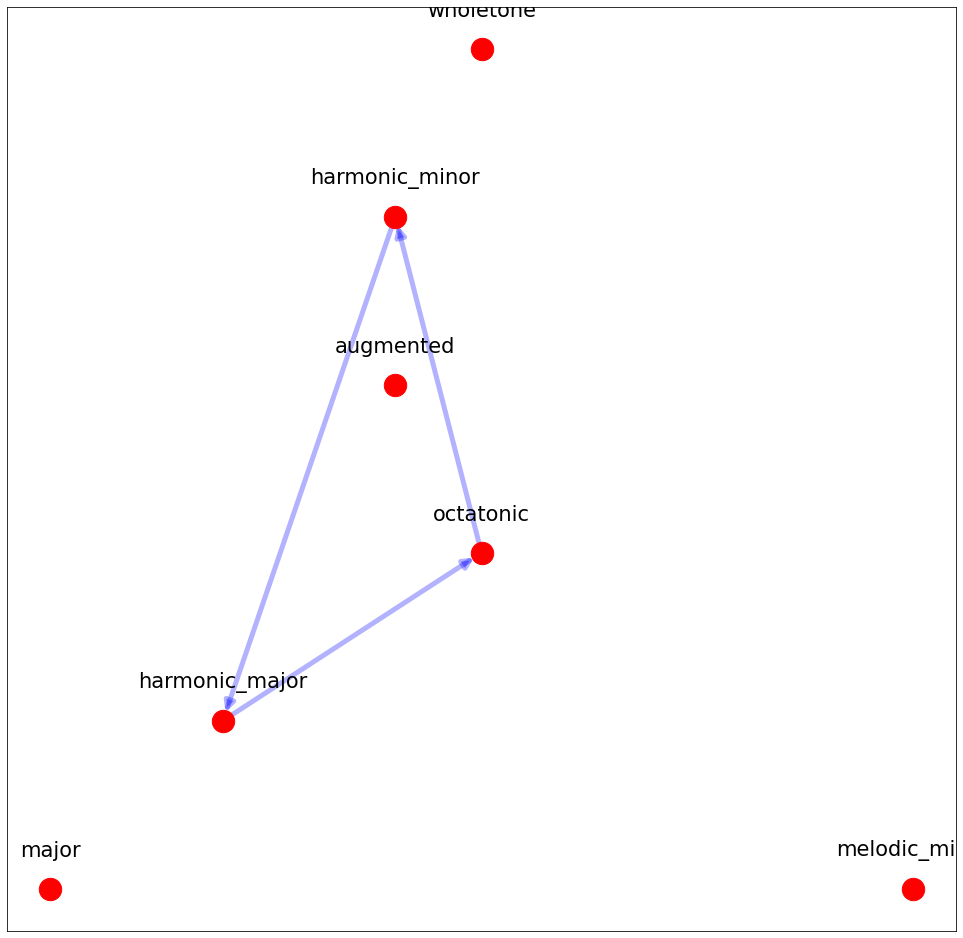

In [20]:
pos = nx.planar_layout(H)
labels = {n: n for n in H.nodes}
for c in nx.simple_cycles(H):
    print(c)
    nx.draw_networkx_nodes(H, pos, node_color="r", node_size=500)
    nx.draw_networkx_labels(H, {key: (val[0], val[1]+0.04) for key, val in pos.items()}, labels, font_size=21)
    # edge_list = [(a, b) for a, b in G.edges if a[1] != b[1]]
    nx.draw_networkx_edges(
        H,
        pos,
        width=5,
        edgelist=list(zip(c, c[1:] + c[:1])),
        arrowsize=20,
        alpha=0.3,
        edge_color="b",
    )
    # nx.draw_networkx_edge_labels(G, pos, edge_labels=colors)

    plt.show()

In [21]:
pred, dist = nx.dijkstra_predecessor_and_distance(G, ('major', 0))

In [22]:
dist

{('major', 0): 0,
 ('melodic_minor', 2): 1,
 ('major', 7): 1,
 ('harmonic_minor', 9): 1,
 ('wholetone', 1): 2,
 ('major', 2): 2,
 ('harmonic_major', 9): 2,
 ('octatonic', 2): 2,
 ('harmonic_minor', 4): 2,
 ('melodic_minor', 9): 2,
 ('melodic_minor', 0): 3,
 ('melodic_minor', 4): 3,
 ('melodic_minor', 6): 3,
 ('melodic_minor', 8): 3,
 ('melodic_minor', 10): 3,
 ('major', 9): 3,
 ('harmonic_minor', 11): 3,
 ('augmented', 0): 3,
 ('melodic_minor', 11): 3,
 ('melodic_minor', 5): 3,
 ('harmonic_major', 4): 3,
 ('octatonic', 0): 3,
 ('wholetone', 0): 3,
 ('harmonic_major', 7): 4,
 ('major', 4): 4,
 ('harmonic_major', 11): 4,
 ('octatonic', 1): 4,
 ('major', 6): 4,
 ('harmonic_major', 1): 4,
 ('harmonic_major', 3): 4,
 ('major', 8): 4,
 ('major', 10): 4,
 ('harmonic_major', 5): 4,
 ('harmonic_minor', 6): 4,
 ('harmonic_minor', 1): 4,
 ('harmonic_minor', 5): 4,
 ('major', 11): 4,
 ('harmonic_major', 6): 4,
 ('major', 5): 4,
 ('harmonic_major', 0): 4,
 ('augmented', 3): 4,
 ('harmonic_minor', 3

In [ ]:
paths = nx.shortest_paths.all_shortest_paths(G, ('melodic_minor', 2), ('melodic_minor', 8))

In [ ]:
for p in paths:
    print('=====================')
    print(len(p))
    print(p)

Better definition of operations
- Group I:
    - elements: `[M] x 12`
    - operations: `[a]`
        - ` a = M#IV (+7)`
        - `-a = Mb7 (-7)`
- Group II:
    - elements: `[M, m] x6`
    - operations: `[b]`
        - ` b = [M#I (+2), m#III (0)]`
        - `-b = [MbIII (0), mbVII (-2)]`
- Group III:
    - elements: `[M, h, H] x4`
    - operations: `[c]`
        - ` c = [M#V (+9), h#III (0), H#VI (0)]`
        - `-c = [MbVI (0), hbVII (-9), HbIII (0)]`
- Group IV:
    - elements: `[m, H, M, h] x6`
    - operations `[d]`
        - ` d = [m#IV (+7), H#VI (0), M#V (+9), h#VI (0)]`
        - `-d = [mbVI(0), HbVII(-7), MbVI (0), hbVII (-9)]`

In [9]:
from enum import Enum

In [10]:
class Family:
    MAJOR = 1
    MELODIC_MINOR = 2
    HARMONIC_MAJOR = 3
    HARMONIC_MINOR = 4

In [15]:
G = nx.DiGraph()

In [16]:
for i in range(12):
    G.add_edge((Family.MAJOR, i), (Family.MAJOR, (i + 1) % 12))

In [17]:
for i in range(2):
    for j in range(6):
        G.add_edge((Family.MAJOR, i+j), (Family.MELODIC_MINOR, (i + j + 2) % 12))
        G.add_edge((Family.MELODIC_MINOR, (i+ j + 2) % 12), (Family.MAJOR, (i + j + 2) % 12))

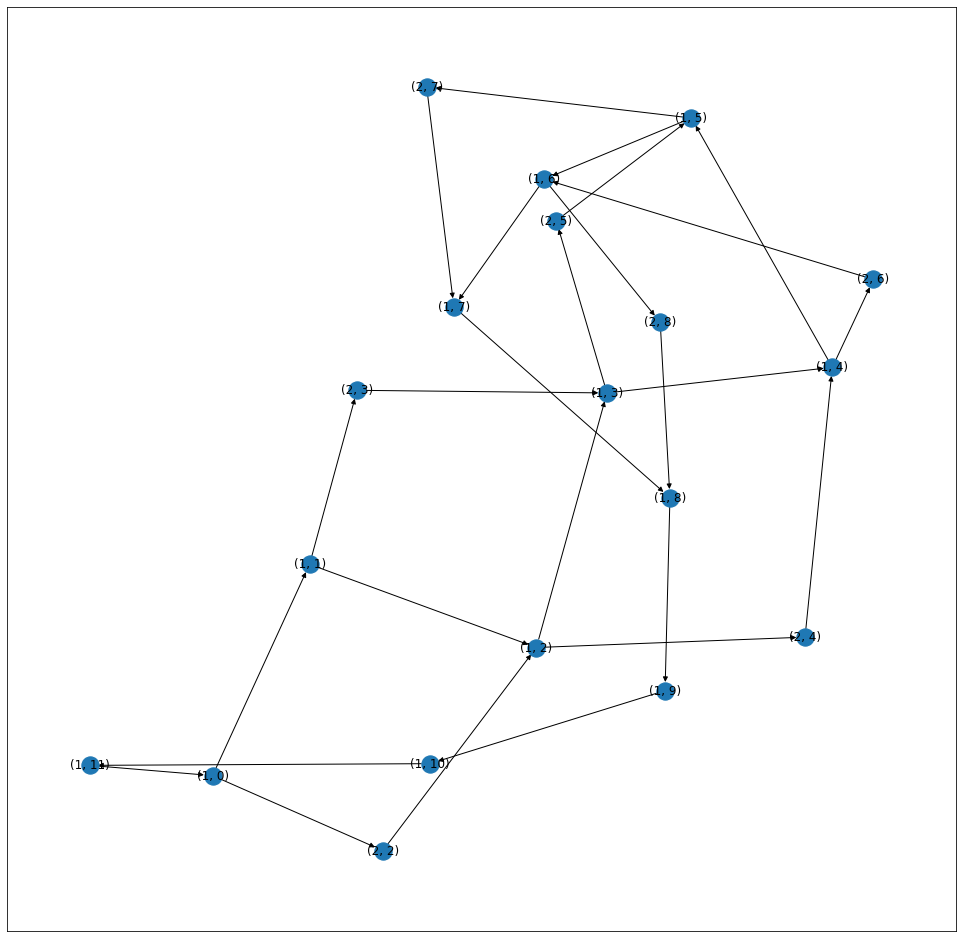

In [18]:
nx.draw_networkx(G)